In [1]:
import numpy as np
import scipy.stats as stats
from scipy import linalg as LA
from matplotlib import pyplot as plt
import matplotlib as mpl

def sample_mvn2D_from_1D(mu1, mu2, sigma1, sigma2, rho, N):
    x0 = np.random.normal(size=N)
    y0 = np.random.normal(size=N)
    x = mu1 + sigma1*x0
    y = mu2 + sigma2*(rho*x0 + np.sqrt(1-rho**2)*y0)
    A = np.hstack((x.reshape(-1,1), y.reshape(-1,1)))
    return A

def visualize2D(A, cmap='blue'):
    A = A.reshape((-1,2))
    plt.scatter(A[:,0], A[:,1])
    lmax, lmin = np.max(A), np.min(A)
    plt.xlim(lmin,lmax)
    plt.ylim(lmin,lmax)

def visualizeEVec(V):
    V = np.array(V)
    plt.scatter(0,0, c='k')
    plt.scatter(V[0,:], V[1,:], c='red')

def PCA(A, out=False):
    mean_point = np.mean(A, 0, keepdims=True)
    A0 = A - mean_point
    C = A0.T.dot(A0)
    if out:
        print('Covariance matrix:\n{}'.format(C))
    l, v = LA.eig(C)
    l = l.real
    ids = np.argsort(-l)
    lambdas, V = l[ids], v[:,ids]
    principal_components = list(V.T)
    if out:
        print('Eigenvalues & eigenvectors')
        for i, (l, v) in enumerate(list(zip(lambdas, principal_components))):
            print('l_{} = {:.2f}\tv_{} = {}'.format(i, l, i, v.flatten()))
    return principal_components

def projectPoints(A, v):
    mean_point = np.mean(A, 0, keepdims=True)
    A0 = A - mean_point
    P = v.dot(v.T) / (v.T.dot(v))
    PA = (P.dot(A0.T)).T + mean_point
    return PA

Covariance matrix:
[[1675.75323616  997.42117194]
 [ 997.42117194 7602.66696436]]
Eigenvalues & eigenvectors
l_0 = 7766.02	v_0 = [-0.16161994 -0.98685308]
l_1 = 1512.40	v_1 = [-0.98685308  0.16161994]

Centered data points (blue) with calculated principal components (red):


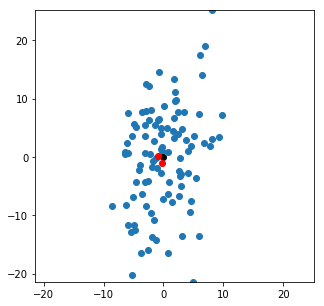


1 principal component:
	Points projected on the component (orange):


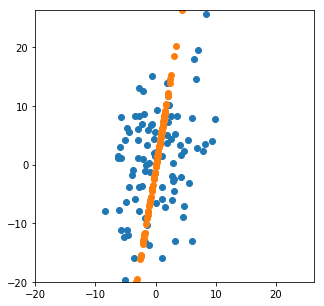

	Variance along the component: 77.66
	The fration of the total variance: 77.66 / 92.78 = 83.70%


In [2]:
N = 100
mu1, mu2 = 1, 2
sigma1, sigma2 = 4, 9
rho = 1/3

mpl.rcParams['figure.figsize'] = (5,5)
A = sample_mvn2D_from_1D(mu1, mu2, sigma1, sigma2, rho, N)
mean_point = np.mean(A, 0, keepdims=True)
A0 = A - mean_point
pc = PCA(A, out=True)

print('\nCentered data points (blue) with calculated principal components (red):')
visualize2D(A0)
visualizeEVec(pc)
plt.show()

v1 = pc[0].reshape(-1,1)
newA = projectPoints(A, v1)
total_variance = np.sum(np.var(A, 0))
variance1 = np.mean(np.sum((newA-mean_point)**2, axis=1))
fraction = variance1 / total_variance * 100
print('\n{} principal component:'.format(1))
print('\tPoints projected on the component (orange):')
visualize2D(A)
visualize2D(newA)
plt.show()
print('\tVariance along the component: {:.2f}'.format(variance1))
print('\tThe fraction of the total variance: {:.2f} / {:.2f} = {:.2f}%'.format(variance1, total_variance, fraction))

In [3]:
rhos = np.linspace(-1,1,50)
fractions = []
for rho in rhos:
    A = sample_mvn2D_from_1D(mu1, mu2, sigma1, sigma2, rho, N)
    mean_point = np.mean(A, 0, keepdims=True)
    total_variance = np.sum(np.var(A, 0))
    pc = PCA(A)
    v1 = pc[0].reshape(-1,1)
    newA = projectPoints(A, v1)
    variance1 = np.mean(np.sum((newA-mean_point)**2, axis=1))
    fraction = variance1 / total_variance * 100
    fractions.append(fraction)

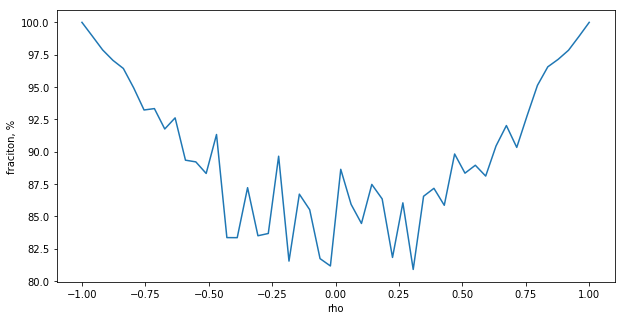

In [4]:
mpl.rcParams["figure.figsize"] = (10,5)
plt.plot(rhos, fractions)
plt.xlabel('rho')
plt.ylabel('fraciton, %')
plt.show()